## EDA - Prediction of electric consumption (KWH)

The Residential Energy Consumption Survey, RECS, collects energy-related data on a nationally representative sample of U.S. homes. It is a leading data source for residential energy analysis.

### Project objectives:
In this project, we will analyze and visualize the data by identifying the features' importance with the strongest statistical associations to residential electricity usage (KWH), then we will apply the data processing and feature selection if necessary. At the end, we will predict customers' electricity consumption using supervised machine learning techniques.

#### Note: 

In this Notebook, we are working on Exploratory Data Analysis (**EDA**) and in the 2nd Notebook we will work on data preprocessing and feature selection, in the 3rd Notebook we will work on the development of ML models.

### Exploratory Data Analysis Life Cycle

#### 1. Data Collection And Manipulation

#### 2. Exploratory Data Analysis 
$\;\;$ 2.1 Missing values<br>
$\;\;$ 2.1 Number of numeric and categorical variables<br> 
$\;\;\;\;\;$ 2.2.1 Analyze the features of the object type<br>
$\;\;\;\;\;$ 2.2.2 Analyze the features of the int and float type<br>
$\;\;$ 2.3 Analyze the Target (kwh)<br>
$\;\;$ 2.4 Analysis of the distribution of numeric variables<br>
$\;\;\;\;\;$ 2.4.1 Correlation<br>
$\;\;\;\;\;$ 2.4.2 Relationship between numerical variables and the 'kwh' target<br>
$\;\;\;\;\;$ 2.4.3 Analyze the distribution / outliers of numeric variables<br>
$\;\;$ 2.5 Analysis of the distribution of categorical variables<br>
$\;\;\;\;\;$ 2.5.1 Relationship between Categorical Variables and the 'kwh' target<br>

#### 3. Conclusion

## 1. Data Collection And Manipulation

In [1]:
# Importing the libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the RECS dataset
path = "data/"
df = pd.read_csv(path+'recs2009_public.csv')
df.head()

,DOEID,REGIONC,DIVISION,REPORTABLE_DOMAIN,TYPEHUQ,NWEIGHT,HDD65,CDD65,HDD30YR,CDD30YR,...,SCALEKER,IECC_Climate_Pub,HDD50,CDD80,GND_HDD65,WSF,OA_LAT,GWT,DesignDBT99,DesignDBT1
0,1,2,4,12,2,2471.68,4742,1080,4953,1271,...,-2,4A,2117,56,4250,0.48,6,56,9,96
1,2,4,10,26,2,8599.17,2662,199,2688,143,...,-2,3C,62,26,2393,0.61,0,64,38,73
2,3,1,1,1,5,8969.92,6233,505,5741,829,...,-2,5A,2346,49,5654,0.48,3,52,12,88
3,4,2,3,7,2,18003.64,6034,672,5781,868,...,-2,5A,2746,0,4941,0.55,4,55,7,87
4,5,1,1,1,3,5999.61,5388,702,5313,797,...,-2,5A,2251,0,5426,0.61,4,50,13,90


In [3]:
df.columns

Index(['DOEID', 'REGIONC', 'DIVISION', 'REPORTABLE_DOMAIN', 'TYPEHUQ',
       'NWEIGHT', 'HDD65', 'CDD65', 'HDD30YR', 'CDD30YR',
       ...
       'SCALEKER', 'IECC_Climate_Pub', 'HDD50', 'CDD80', 'GND_HDD65', 'WSF',
       'OA_LAT', 'GWT', 'DesignDBT99', 'DesignDBT1'],
      dtype='object', length=940)

In [4]:
# Check the shape of dataframe
df.shape

(12083, 940)

The database consists of 12083 observations and 940 variables. Independent variables contain information about of the electricity consumption (KWH). The dependent variable 'KWH' refers to the electricity consumption by the customers.

We can see that the names of the features are not consistent

In [5]:
# Convert all column headers to lowercase to facilitate the manipulation of features in the analysis
nettoyage_colonnes_noms = []
colonnes = df.columns
for i in range(len(colonnes)):
    nettoyage_colonnes_noms.append(colonnes[i].lower())
df.columns = nettoyage_colonnes_noms
df.head(2)

,doeid,regionc,division,reportable_domain,typehuq,nweight,hdd65,cdd65,hdd30yr,cdd30yr,...,scaleker,iecc_climate_pub,hdd50,cdd80,gnd_hdd65,wsf,oa_lat,gwt,designdbt99,designdbt1
0,1,2,4,12,2,2471.68,4742,1080,4953,1271,...,-2,4A,2117,56,4250,0.48,6,56,9,96
1,2,4,10,26,2,8599.17,2662,199,2688,143,...,-2,3C,62,26,2393,0.61,0,64,38,73


## 2. Exploratory Data Analysis (EDA)

In [6]:
# View database information, including shape, type, and descriptor name, ...etc,  for each column.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12083 entries, 0 to 12082
Columns: 940 entries, doeid to designdbt1
dtypes: float64(50), int64(885), object(5)
memory usage: 86.7+ MB


We can see that the features types are distributed between 50 float, 885 integer and 5 objects

In [7]:
# Count the number of unique values for each descriptor
df.nunique()

doeid                12083
regionc                  4
division                10
reportable_domain       27
typehuq                  5
                     ...  
wsf                     50
oa_lat                  35
gwt                     53
designdbt99             90
designdbt1              53
Length: 940, dtype: int64

In [8]:
# Checking of unique features equal to 12083 (maximum of sample)
unique_feature = df.nunique() == df.shape[0]
unique_feature[unique_feature.values == True]

doeid    True
dtype: bool

As we can see, the values of the **doeid** variable are unique identifiers for each customer. I will remove it from the dataframe, as they do not give useful information in the exploratory analysis.

In [9]:
# Remove irrelevant variable as shown above
df = df.drop(["doeid"], axis = 1)

In [10]:
# Describe all the statistical variables of the database
df.describe()

,regionc,division,reportable_domain,typehuq,nweight,hdd65,cdd65,hdd30yr,cdd30yr,climate_region_pub,...,periodkr,scaleker,hdd50,cdd80,gnd_hdd65,wsf,oa_lat,gwt,designdbt99,designdbt1
count,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,...,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000
mean,2.628321,5.373086,14.783663,2.659604,9402.981870,4141.375238,1415.406108,4135.146983,1443.503104,2.601010,...,-1.935943,-1.955392,1681.961764,139.568485,3763.728544,0.499036,5.656046,59.128693,20.256311,90.359431
std,1.042142,2.859366,8.195824,1.192627,5192.101419,2317.759375,1134.659475,2260.543686,1021.748722,1.349571,...,0.589907,0.415810,1401.079218,264.186908,2597.754419,0.083520,6.797205,8.678293,15.337626,6.166669
min,1.000000,1.000000,1.000000,1.000000,476.100000,0.000000,0.000000,0.000000,0.000000,1.000000,...,-2.000000,-2.000000,0.000000,0.000000,0.000000,0.310000,0.000000,36.000000,-23.000000,60.000000
25%,2.000000,3.000000,8.000000,2.000000,6297.040000,2197.500000,561.000000,2224.000000,712.000000,1.000000,...,-2.000000,-2.000000,262.500000,4.000000,1246.500000,0.430000,1.000000,52.000000,9.000000,87.000000
50%,3.000000,5.000000,15.000000,2.000000,7970.630000,4483.000000,1045.000000,4502.000000,1179.000000,3.000000,...,-2.000000,-2.000000,1684.000000,30.000000,3878.000000,0.500000,3.000000,58.000000,18.000000,90.000000
75%,3.000000,7.000000,21.000000,3.000000,11330.030000,5913.000000,1897.000000,5854.000000,1842.500000,4.000000,...,-2.000000,-2.000000,2662.000000,117.000000,5834.000000,0.560000,7.000000,66.000000,33.000000,94.000000
max,4.000000,10.000000,27.000000,5.000000,95779.140000,12525.000000,5480.000000,13346.000000,5357.000000,5.000000,...,5.000000,3.000000,7623.000000,1884.000000,11567.000000,0.800000,34.000000,89.000000,67.000000,118.000000


***Note*** : As we can see that it's difficult to display all the features statistical description in Notebook in the same time (+900 variables). 

A possible solution is to share the features between groups (examples: numerical or categorical, ..., etc.), then analyzing the statistical description of each group.

### 2.1  Missing Values

In [11]:
# Show variable names with missing values (Nan)
features_with_nan = [features for features in df.columns if df[features].isnull().sum()>1]
print(features_with_nan)

[]


As can we see, there are no missing values of Nan type in the data.

### 2.2 Number of Numeric and Categorical Variables

#### 2.2.1 Analyze the features of the object type

In [12]:
# Analyze the categorical_object_features
categorical_object_features = [feature for feature in df.columns if df[feature].dtype == 'O']
categorical_object_features

['metromicro', 'ur', 'nocrcash', 'nkrgalnc', 'iecc_climate_pub']

In [13]:
for feature in categorical_object_features:
    print("\n","Feature:",feature,"\n")
    print(df[feature].value_counts())


 Feature: metromicro 

METRO    10302
MICRO     1109
NONE       672
Name: metromicro, dtype: int64

 Feature: ur 

U    9656
R    2427
Name: ur, dtype: int64

 Feature: nocrcash 

-2    9958
-2    2028
1       18
3       10
4       10
5        9
2        7
1        6
16       4
12       3
8        3
6        3
24       2
.        2
55       2
12       2
4        2
3        2
15       2
10       1
10       1
20       1
24       1
25       1
55       1
40       1
20       1
6        1
28       1
Name: nocrcash, dtype: int64

 Feature: nkrgalnc 

-2    9958
-2    2028
5       42
3       11
1       10
10       8
10       5
5        5
15       2
.        2
1        2
2        1
3        1
8        1
55       1
30       1
20       1
15       1
8        1
77       1
2        1
Name: nkrgalnc, dtype: int64

 Feature: iecc_climate_pub 

4A               2703
5A               2402
1A-2A            1740
3B-4B            1523
3A               1235
6A-6B             971
5B-5C             476
3C   

In [72]:
# the unique values of "nkrgalnc" 
df['nkrgalnc'].value_counts().index

Index([  -2, '-2',    5,    3,    1,   10, '10',  '5', '15',  '.',  '1', '77',
        '8',   55,   30,   20,   15,    8,  '2',  '3',    2],
      dtype='object')

***Notes:***

From these results, the variables "metromicro", "iecc_climate_pub", and "ur" are categorical variables and in the feature engineering step we will transform these variables. 

For the variables "nkrgalnc", and "nocrcash", we notice the presence of points "." as values instead of an integer values, in the data transformation step, we will replace these points and convert the variables to integer.

#### 2.2.2 Analyze the features of the int and float type

Since we have over 900 features, classifying these features between categorical and numeric is difficult and time consuming.

After the data analysis is visually done, a threshold is given to categorize the variables.In our case, we give 25 as the threshold. In this case, the variables having more than 25 unique values are considered as numeric and the variable having less than 25 values are considered as categorical variables.

In [16]:
# Numérique ou Catégorique
numeric_features = [feature for feature in df.columns if (df[feature].dtype != 'O'
                     and len(df[feature].unique()) >= 25)]
categorical_features = [feature for feature in df.columns if (df[feature].dtype != 'O' 
                        and len(df[feature].unique()) < 25)]

print("Numeric variables: ",numeric_features,"\n")
print("Number of numeric: ",len(numeric_features),"\n")
print("="*110,"\n")
print("Categorical variables: ",categorical_features,"\n")
print("Number of categorical: ",len(categorical_features))


Numeric variables:  ['reportable_domain', 'nweight', 'hdd65', 'cdd65', 'hdd30yr', 'cdd30yr', 'yearmade', 'numapts', 'temphome', 'tempgone', 'tempnite', 'temphomeac', 'tempgoneac', 'tempniteac', 'lgt4', 'lgt1', 'lgt1ee', 'hhage', 'telldays', 'totsqft', 'totsqft_en', 'tothsqft', 'totusqft', 'totcsqft', 'totucsqft', 'kwh', 'kwhsph', 'kwhcol', 'kwhwth', 'kwhrfg', 'kwhoth', 'btuel', 'btuelsph', 'btuelcol', 'btuelwth', 'btuelrfg', 'btueloth', 'dollarel', 'dolelsph', 'dolelcol', 'dolelwth', 'dolelrfg', 'doleloth', 'cufeetng', 'cufeetngsph', 'cufeetngwth', 'cufeetngoth', 'btung', 'btungsph', 'btungwth', 'btungoth', 'dollarng', 'dolngsph', 'dolngwth', 'dolngoth', 'gallonlp', 'gallonlpsph', 'gallonlpwth', 'gallonlpoth', 'btulp', 'btulpsph', 'btulpwth', 'btulpoth', 'dollarlp', 'dollpsph', 'dollpwth', 'dollpoth', 'gallonfo', 'gallonfosph', 'gallonfowth', 'btufo', 'btufosph', 'btufowth', 'dollarfo', 'dolfosph', 'dolfowth', 'gallonker', 'gallonkersph', 'btuker', 'btukersph', 'btukeroth', 'dollarker'

***Note:***

From the results, we notice that most of the features are categorical ( ***numeric:  104 Vs categorical:  830***)

### 2.3 Analyze the Target (kwh)

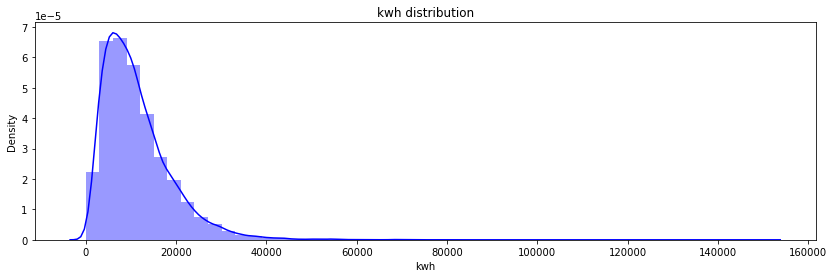

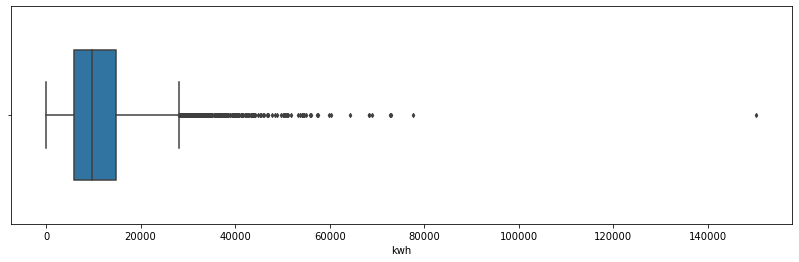

In [47]:
# Plot the kwh histogram
plt.figure(figsize=(14,4))
plt.title('kwh distribution')
plt.xlabel('kwh')
ax = sns.distplot(df['kwh'], color = 'b')

# kwh boxplot
plt.figure(figsize=(14,4))
sns.boxplot(x=df["kwh"], width=0.6, fliersize= 3)
plt.show()

From histogram, we can see that the distribution is skewed to the right. Electricity consumption in most house is between 0 - 30000. Based on the boxplot, we note that these consumption above 30000 indicate the presence of outliers, this suggests to us that these consumptions are about luxury villas, or old houses and castles.

### 2.4 Analysis of the Distribution of Numeric Variables

In this step, we will analyze the distribution of some relevant numeric variables

#### 2.4.1 Correlation

As we have more than 100 numeric features, visualizing these features is inappropriate in a heatmap, we proposed to look for the variables with more than 50% correlation with the target and to visualize them.

After several manual testing, we have found that **20** variables is the appropriate number.

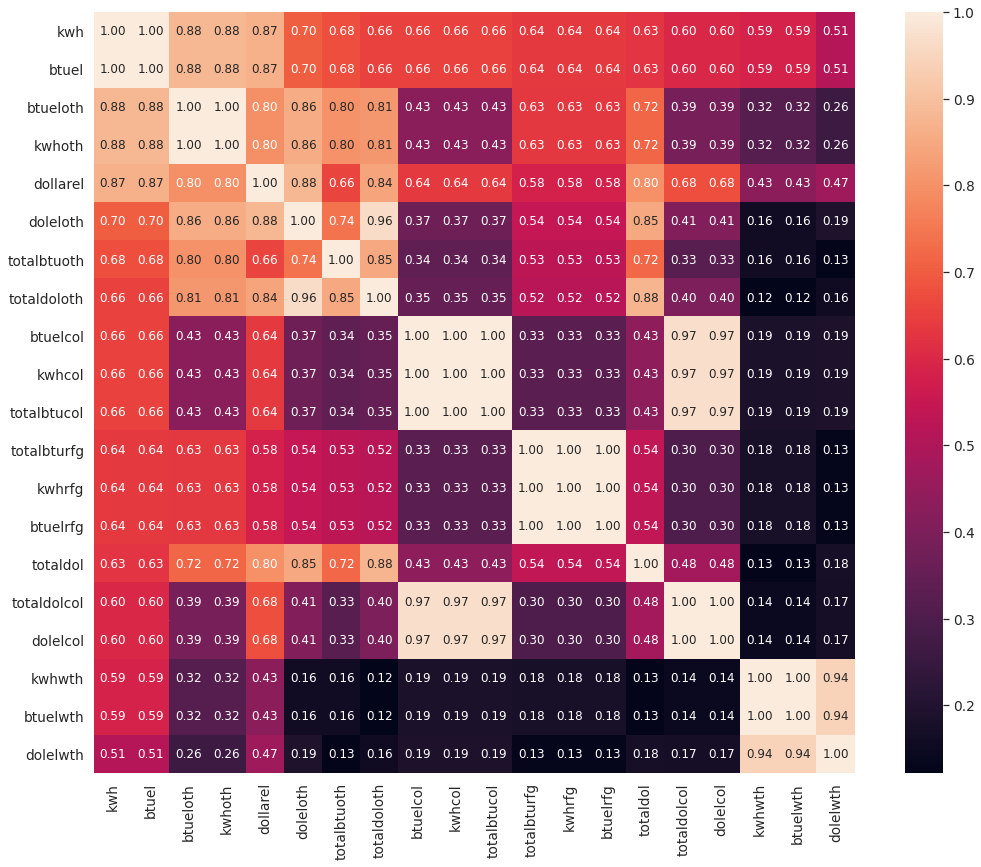

In [102]:
# Correlation matrix
k = 20 # number of variables for heatmap
corrmat = df.corr()2.5.1
cols = corrmat.nlargest(k, 'kwh')['kwh'].index #Return the first `n` rows with the largest values in `columns`
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
plt.figure(figsize=(18, 14))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 12}, 
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()

According to the zoomed heatmap, the variables most strongly correlated with the target **"kwh"** are: **"btuel"**, **"btueloth"**, **"kwhoth"**,  and **"dollarel"**.

We notice the presence of several correlations between the variables in the heatmaps, and as an example:

**"btuelol"**, **"kwhvol"**, and **"dolecol"** are among the variables most strongly correlated with the variable **"totaldocol"**.

Most correlations are justified, for example: **"btuel"** is the site's total electricity consumption in thousands of BTUs, where **"KWH"** is the site's total electricity consumption in kilowatt-hours. So these two variables are in a proportional relationship.

These correlation values give us an idea on the relation of numerical variables, will help us a lot in the reduction and the selection of features for our models.
As an example of reduction and selection:

**"totaldol"** and **"totaldoloth"** are among the most strongly correlated variables (**cor= 88**). So, we can keep **"totaldoloth"** for our ML model instead of **"totaldol"**, because it is more correlated with the **"kwh"** traget.

#### 2.4.2 Relationship between Numerical Variables and the 'kwh' target

As it is difficult to visualize 20 variables in a Scatter plot at the same time, we propose to display only the 5 features most correlated with the target "kwh"

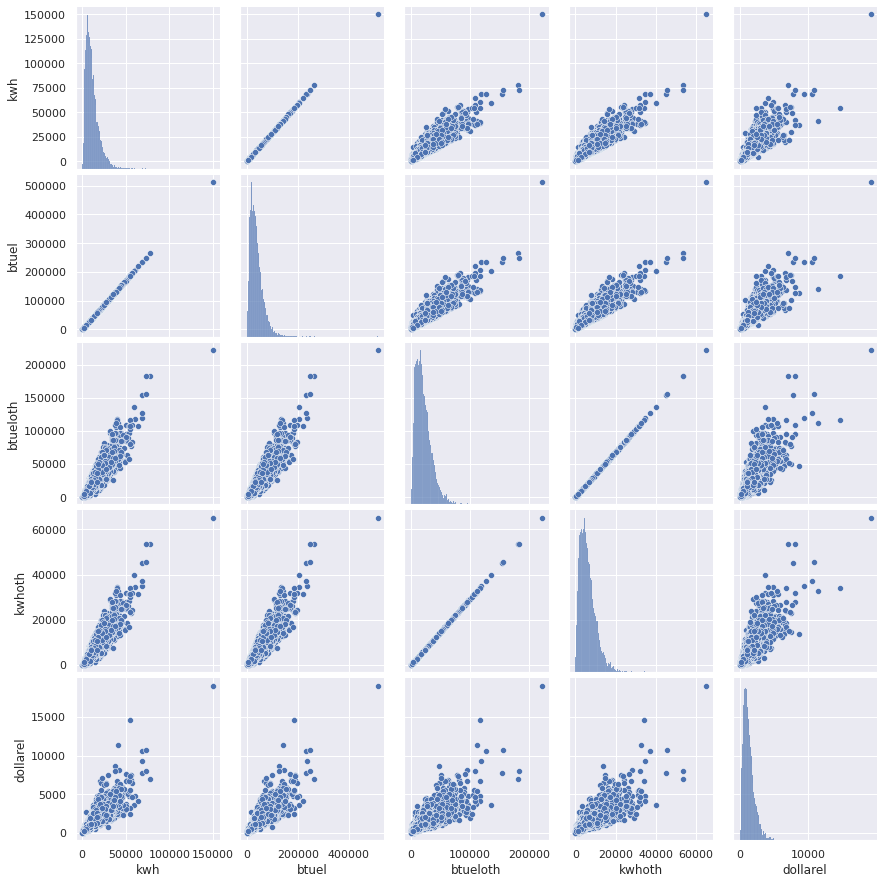

In [66]:
# Scatterplot
k = 5 # number of variables 
corrmat = df.corr()
cols = corrmat.nlargest(k, 'kwh')['kwh'].index #Return the first `n` rows with the largest values in `columns`
sns.set()
sns.pairplot(df[cols], size = 2.5)
plt.show();

These Scatterplot give us a reasonable idea of the relationships between the variables.
The descriptions **"dollarel"**, **"kwhoth"**, and **"btueloth"** seem to be linearly related to **"kwh"**. The relationships are positive, which means that as one variable increases, the other also increases.

#### 2.4.3 Analyze the distribution/outliers of numeric variables

******** Distribution of numeric variables ********

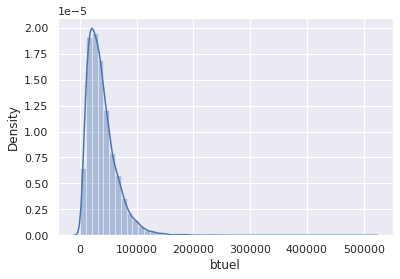

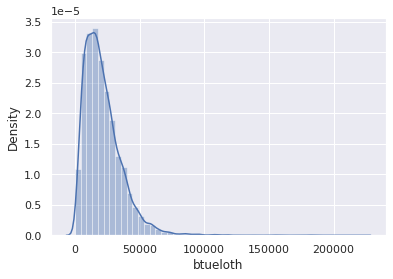

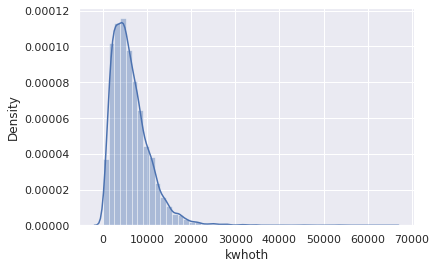

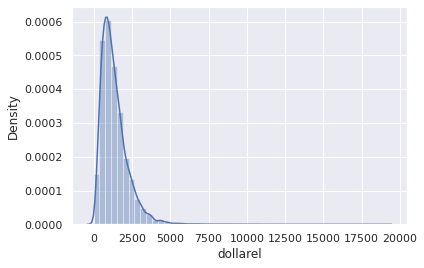

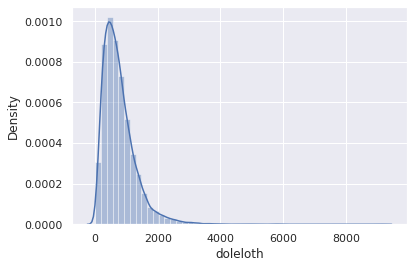

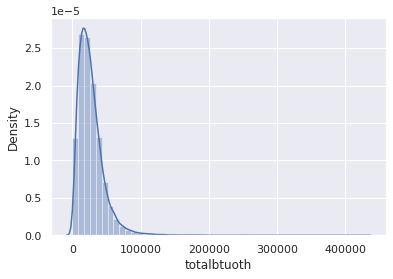

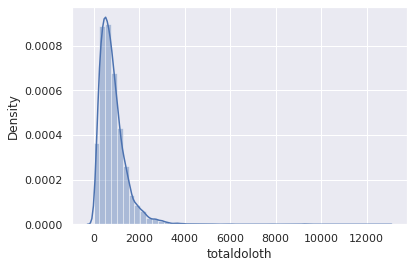

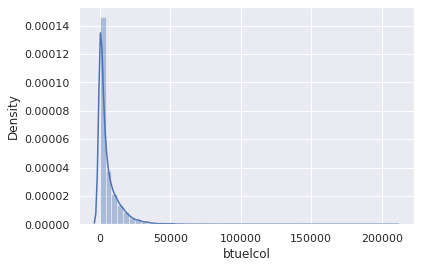

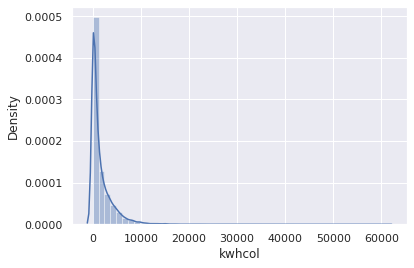

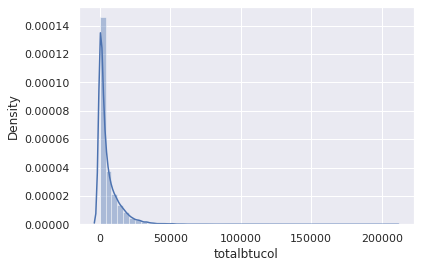

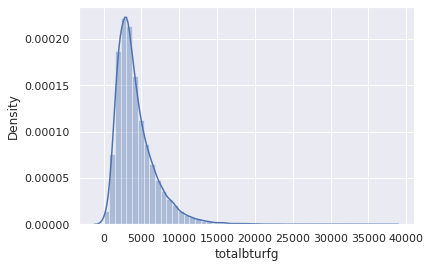

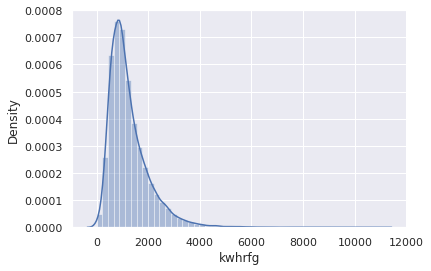

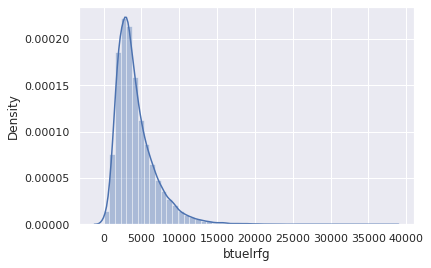

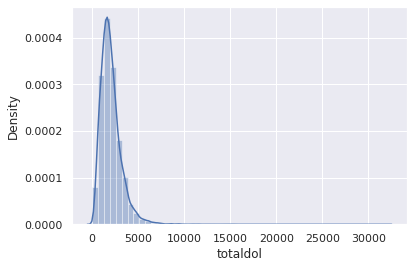

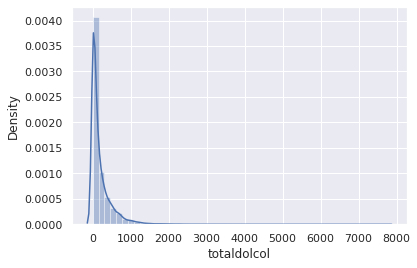

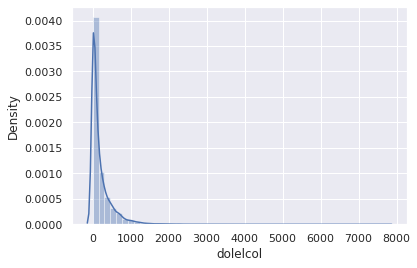

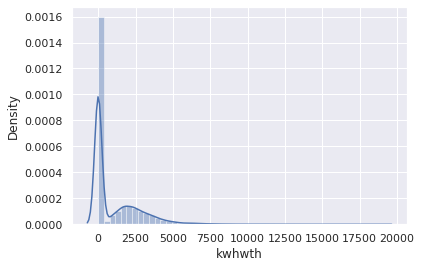

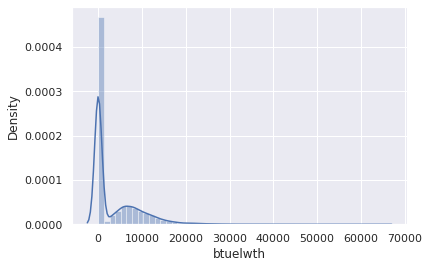

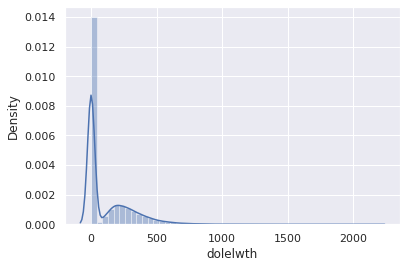

In [144]:
# Histogram plot for 19 variables (without "kwh")
k = 20 # number of variables 
corrmat = df.corr()
cols = corrmat.nlargest(k, 'kwh')['kwh'].index
for feature in cols[1:]:
    sns.distplot(df[feature], color = 'b')
    plt.show()


From histogram plot, we can see that the distribution of the most features is skewed to the right, and that indicate the presence of outliers 

******** Outliers of numeric variables ********

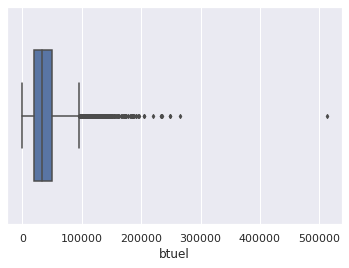

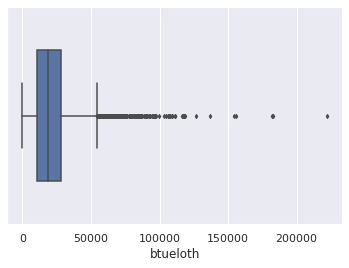

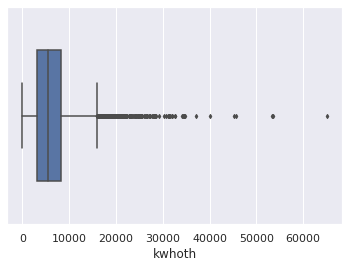

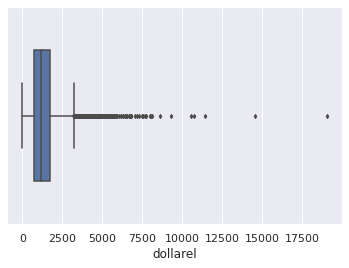

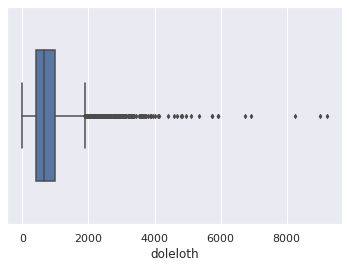

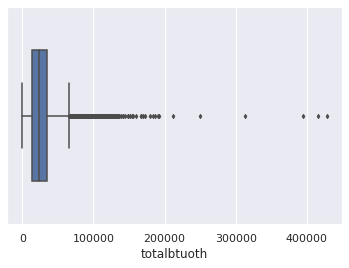

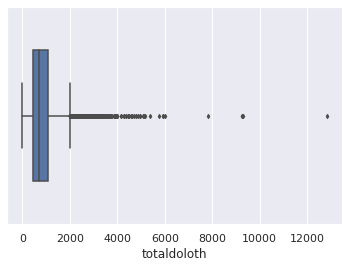

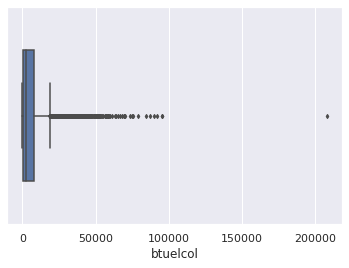

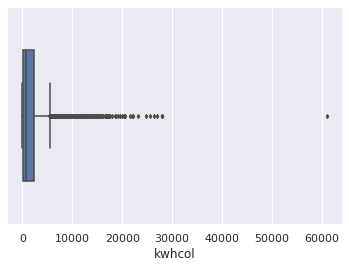

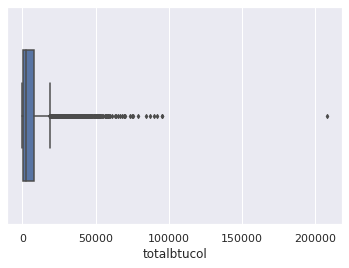

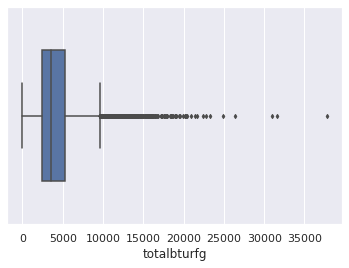

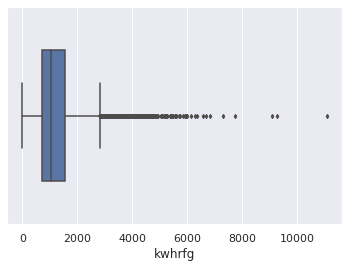

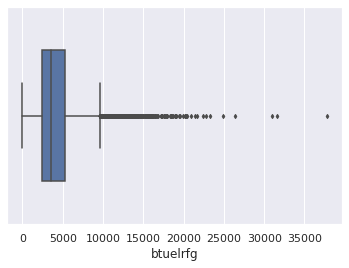

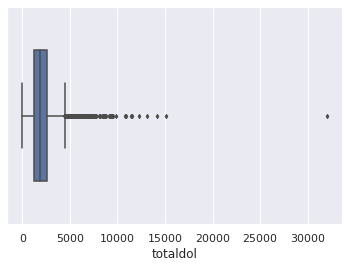

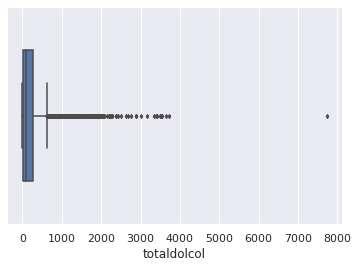

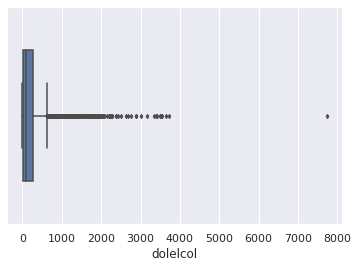

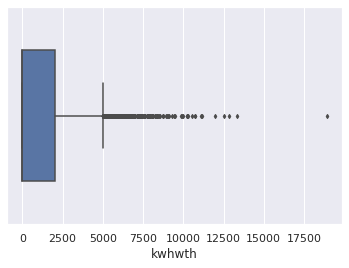

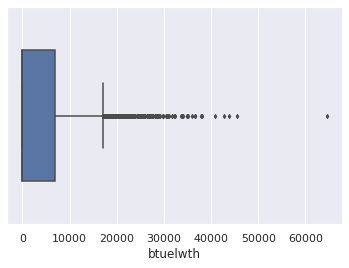

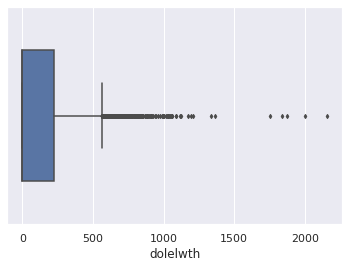

In [145]:
# boxplot for 19 variables (without "kwh")
for feature in cols[1:]:
    sns.boxplot(x=df[feature], width=0.6, fliersize= 3)
    plt.show()

From boxplot, we notice the presence of outliers in most of the features

### 2.5 Analysis of the distribution of categorical variables

As we have more the **830** categorical features, we will analyze the distribution of some relevant categorical variables

#### 2.5.1 Relationship between Categorical Variables and the 'kwh' target

The best way to visualize the relation between the target and the categorical features is the box plot.

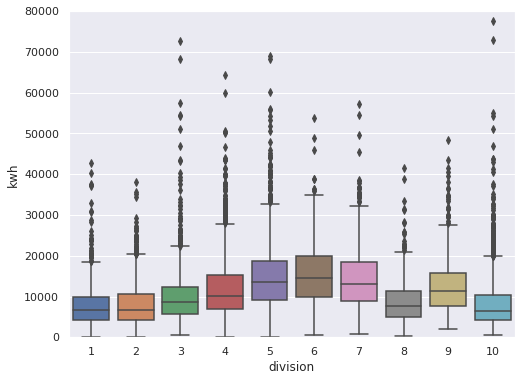

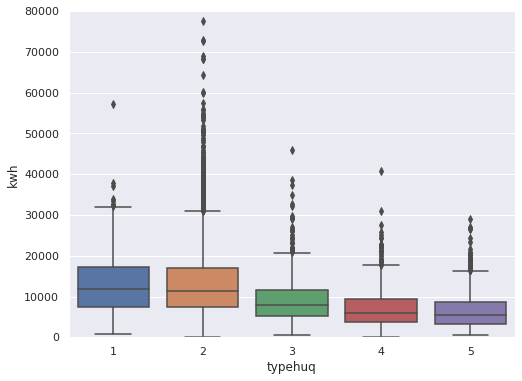

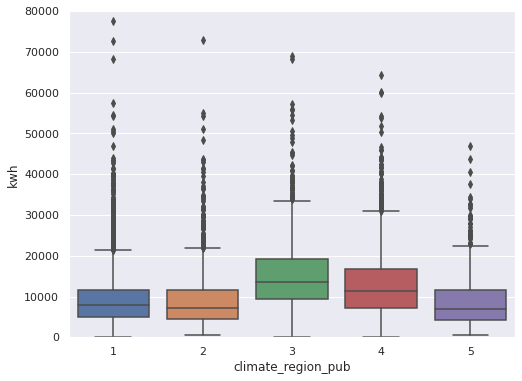

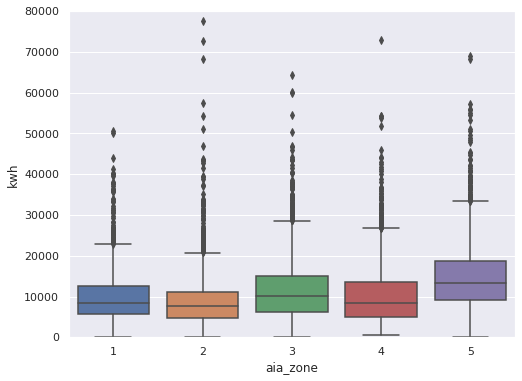

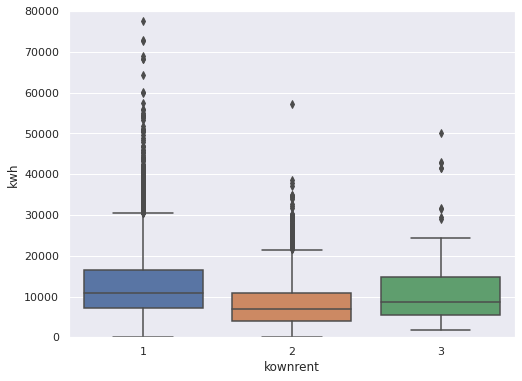

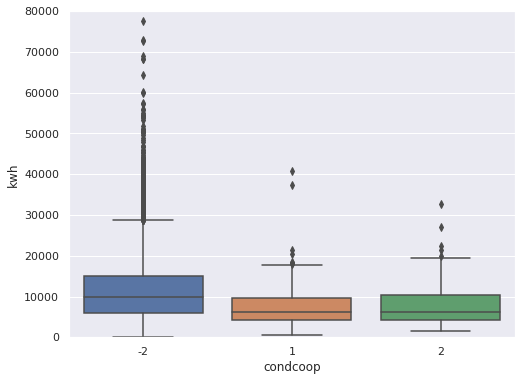

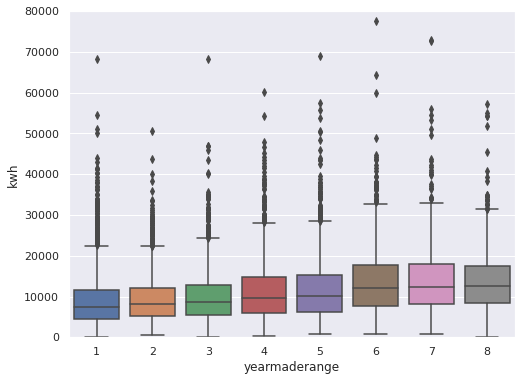

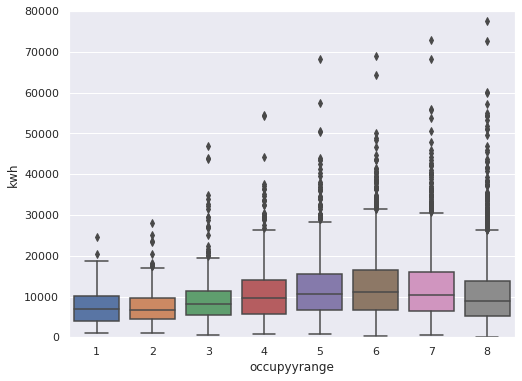

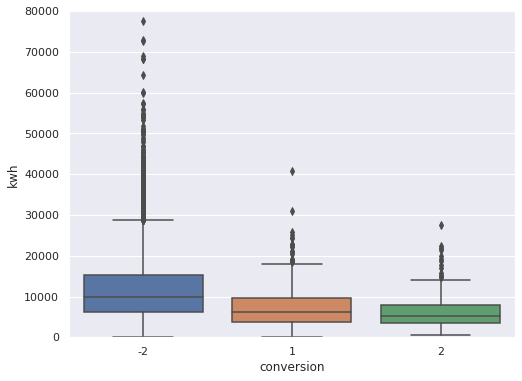

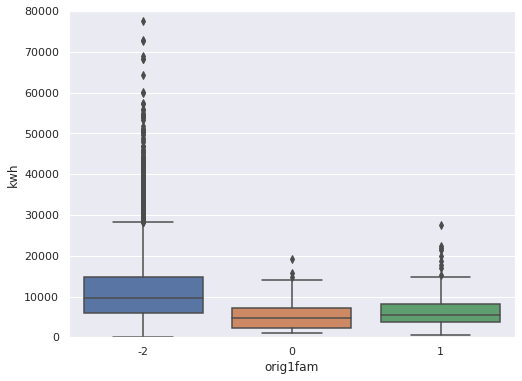

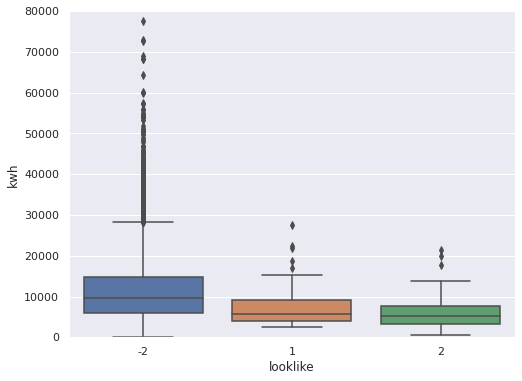

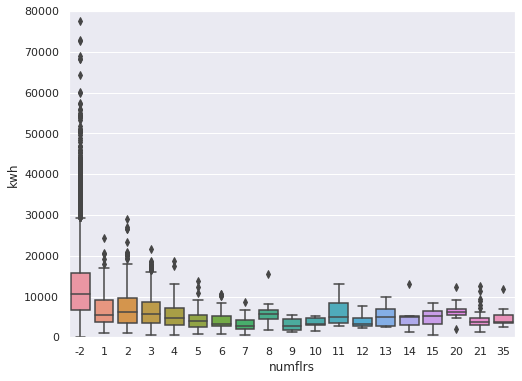

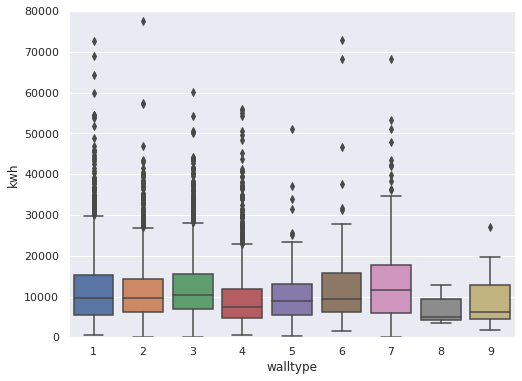

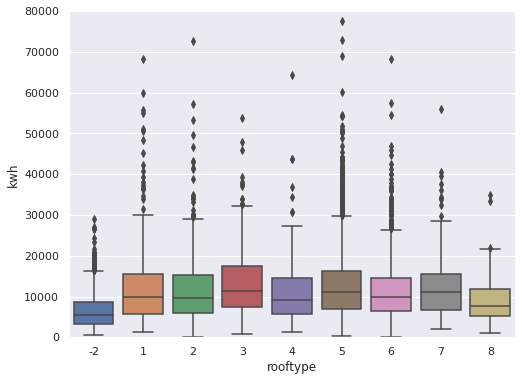

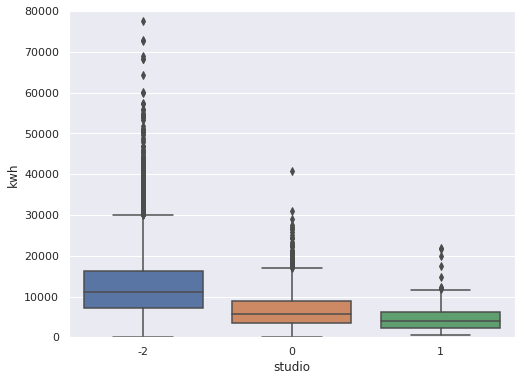

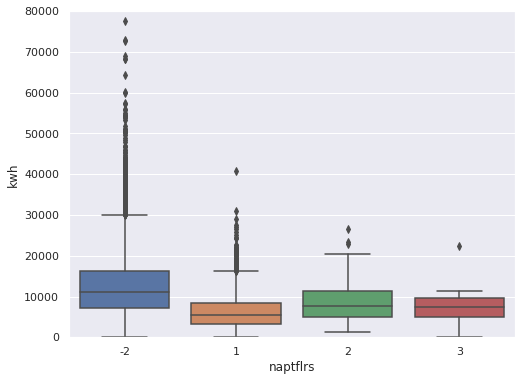

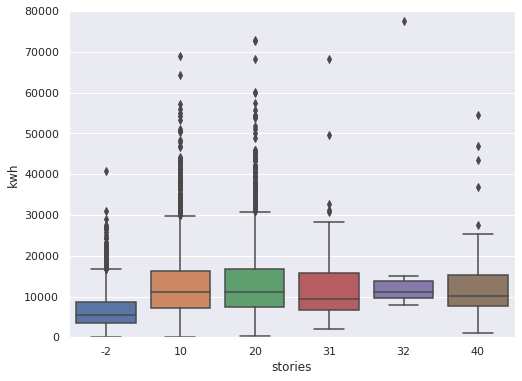

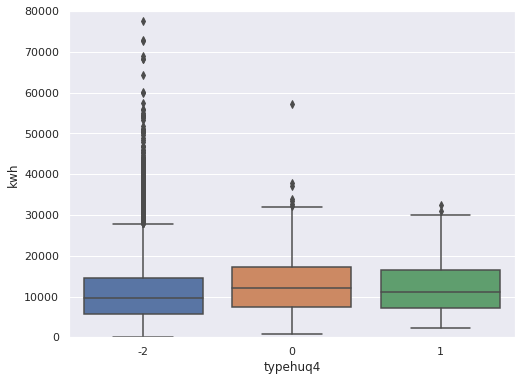

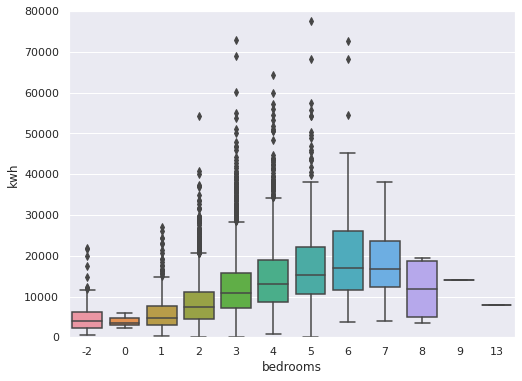

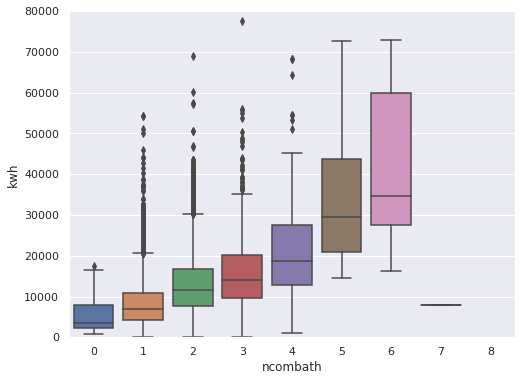

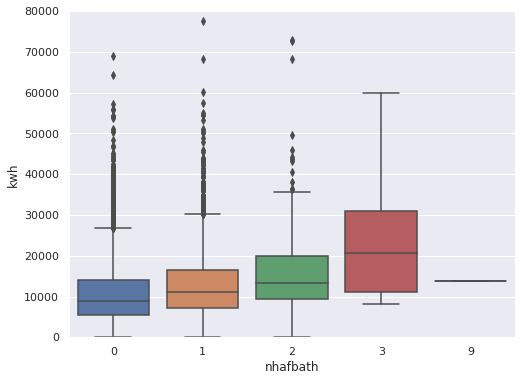

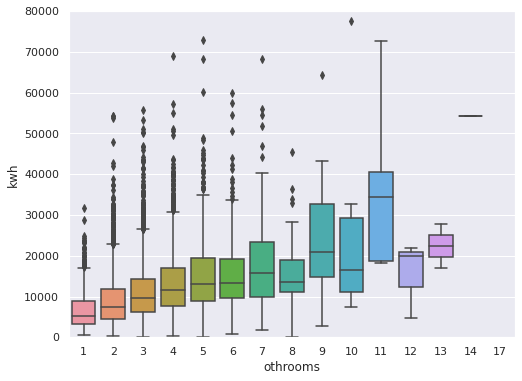

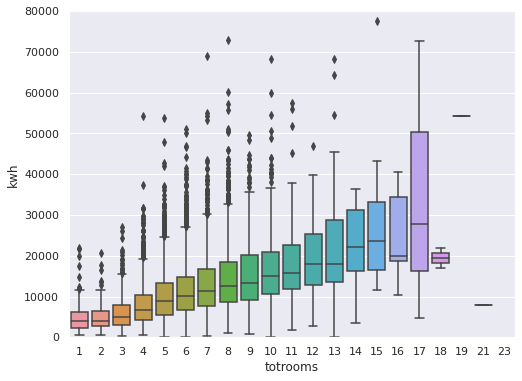

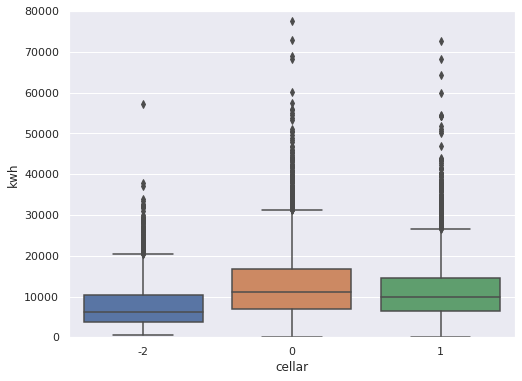

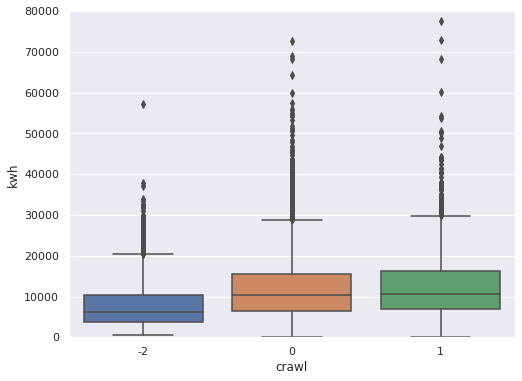

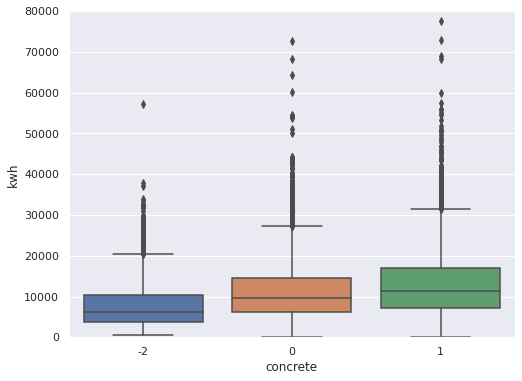

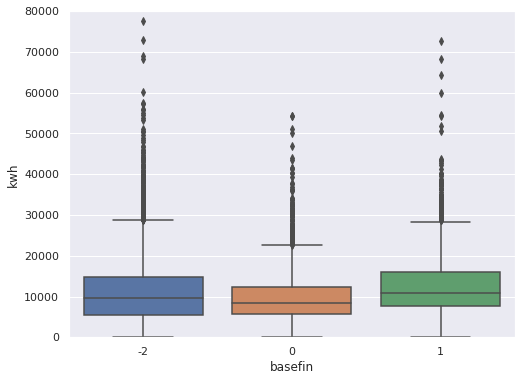

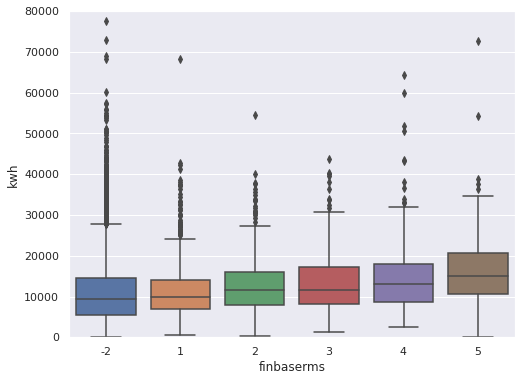

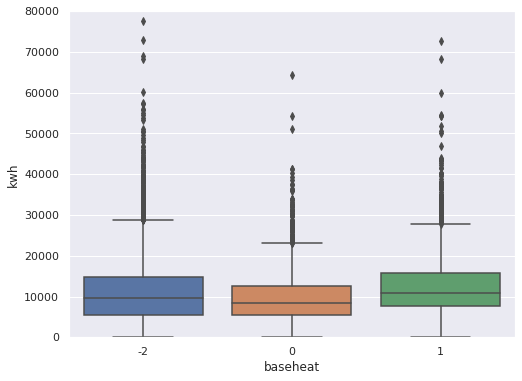

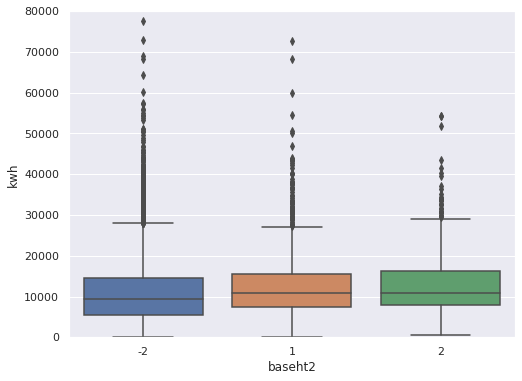

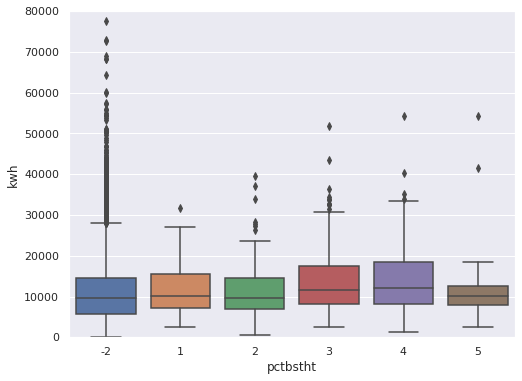

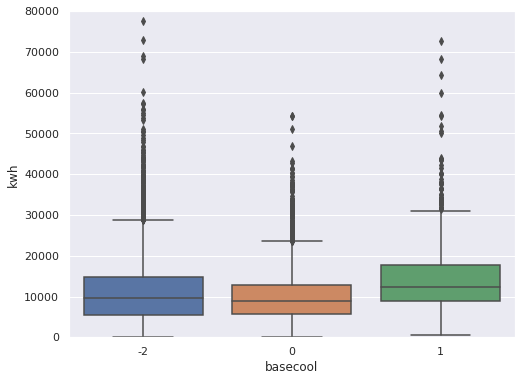

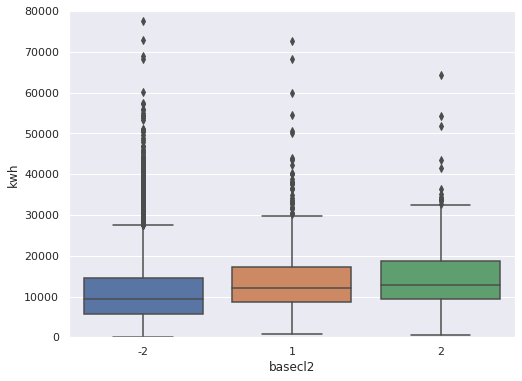

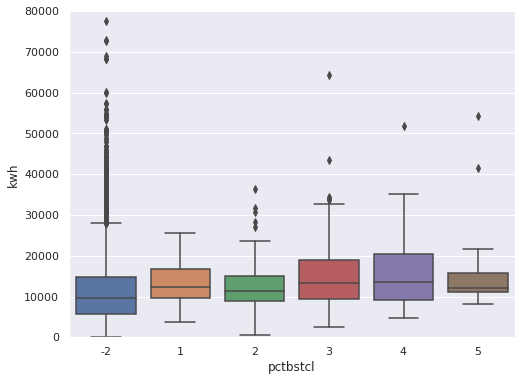

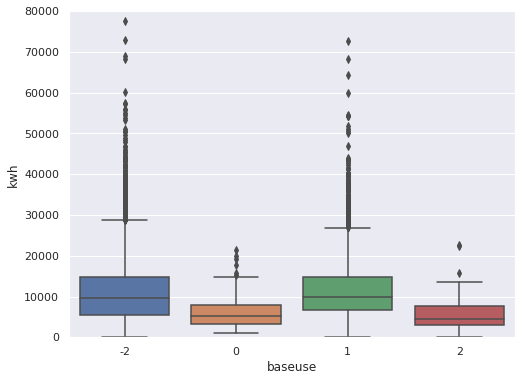

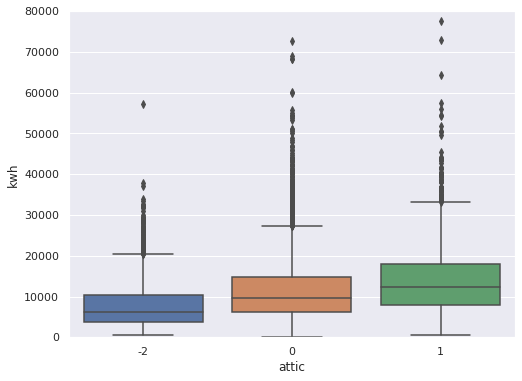

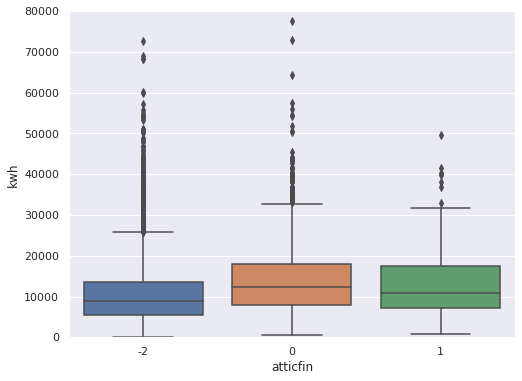

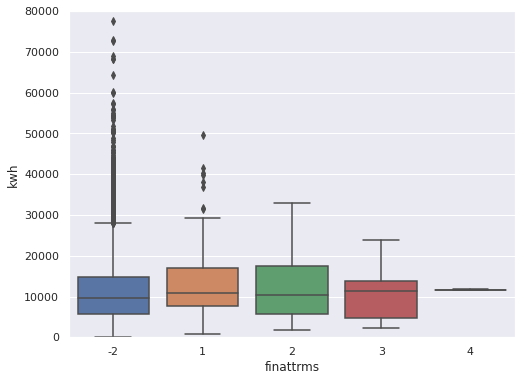

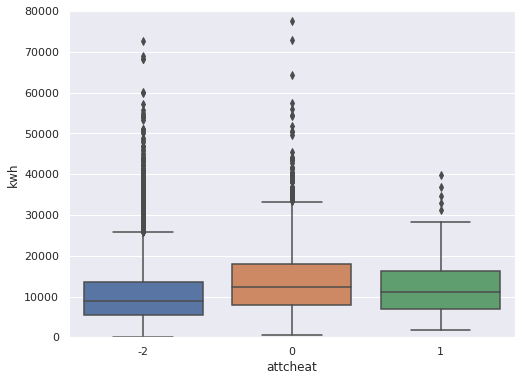

In [151]:
# Display 40 categorical features by box plot (categorical_features/kwh)

for var in categorical_features[1:40]:
    data = pd.concat([df['kwh'], df[var]], axis=1)
    f, ax = plt.subplots(figsize=(8, 6))
    fig = sns.boxplot(x=var, y="kwh", data=data)
    fig.axis(ymin=0, ymax=80000);

From the results " Boxplots", we notice the presence of a relation between certain categorial features and the target "khw" ( proportional relationship). As examples, Total number of rooms in the housing unit "totroms", Type of housing unit "typehuq", Number of half bathrooms "nhafbath" ,..., etc.

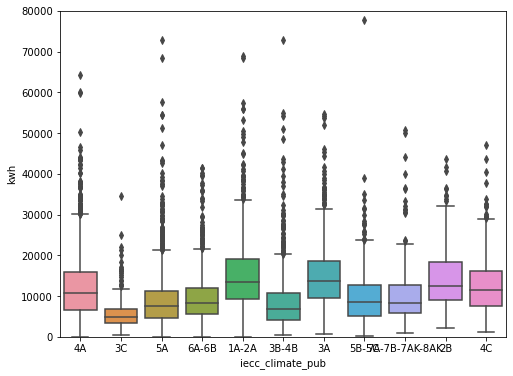

In [65]:
# Relationship between Categorical Variables (Object type) and the 'kwh' target
data = pd.concat([df['kwh'], df["iecc_climate_pub"]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='iecc_climate_pub', y="kwh", data=data)
fig.axis(ymin=0, ymax=80000);

## 3. Conclusion

In the EDA, we notice that the data set has enough samples (12,083) to train and test with no missing values, and most of the features are categorical (numeric: 104 Vs categorical: 830). In addition, we note the presence of outliers values in most of the features; the reason is that there are different types of housing such as luxury villas or old houses and castles. We notice the presence of several correlations between the features (numeric or categorical) and the target "khw", which a good indicator for the machine learning model.

In the next notebook (Data processing and feature selection), we will handle the incorrect values for some features and encoding a categorical features, as well as preparing the data by reducing and selecting the best features for the ML model.